In [379]:
# here we will create a random forest algorithm, and combine it with our models from part and part 2
# the random forest was optimised by itself as well as the other two parts. Thus this section seeks to combine the
# strength of all 3

In [380]:
import os
import numpy as np
import pandas as pd
import pickle
import sys
sys.path
import h2o 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
print(os.getcwd())
dirRawData = "../input/"
dirPData =   "../PData/"
dirPOutput= "../POutput"

dtypes_cat = {
 'target': 'int8',
 'a01': "category",
 'a02': "category",
 'a03': "category",
 'a10': "category",
 'a11': "int8",
 'a12': "category",
 'a13': "category",
 'a16': "category",
 'a17': "category",
 'a18': "category",
 'a19': "category",
 'a20': "category",
 'b02': "category",
 'b03': "category",
 'b04': "category",
 'b07': "category",
 'c02': "category",
 'c04': "category",
 'c05': "category",
 'c06': "category",
 'c07': "category",
 'c08': "category",
 'c09': "category",
 'e01': "category",
 'e03': "category",
 'e11': "category",
 'e13': "category",
 'e14': "category",
 'e21': "category",
 'e22': "category",
 'e24': "category",
 'e25': "category",
 'e17': "category",
 'e18': "category",
 'e19': "category",
 'e20': "category",
 'f03': "category",
 'f04': "category",
 'f05': "category",
 'f07': "category",
 'f09': "category",
 'f27': "category",
 'f29': "category",
 'f30': "category",
 'f33': "category",
 'f34': "category",
 'f10': "category",
 'a04': 'int16',
 'a05': 'int8',
 'a06': 'int8',
 'a07': 'int8',
 'a08': 'int8',
 'a09': 'int8',
 'a14': 'int8',
 'a15': 'int8',
 'b01': 'int8',
 'b05': 'int8',
 'b06': 'int8',
 'c01': 'int8',
 'c03': 'int8',
 'd01': 'int8',
 'd02': 'int8',
 'd03': 'int8',
 'e02': 'int8',
 'e04': 'int8',
 'e05': 'int8',
 'e06': 'int8',
 'e07': 'int8',
 'e08': 'int8',
 'e09': 'int8',
 'e12': 'int8',
 'e15': 'int8',
 'e16': 'int8',
 'e23': 'int8',
 'f01': 'int8',
 'f02': 'int8',
 'f06': 'int8',
 'f08': 'int8',
 'f11': 'int8',
 'f13': 'int8',
 'f15': 'int8',
 'f16': 'int8',
 'f17': 'int8',
 'f18': 'int8',
 'f19': 'int8',
 'f20': 'int8',
 'f21': 'int8',
 'f22': 'int8',
 'f23': 'int8',
 'f24': 'int8',
 'f25': 'int8',
 'f26': 'int8',
 'f28': 'int8',
 'f31': 'int8',
 'f32': 'int8',
 'unique_id': 'int64'}


dtypes_object = {
 'a01': "O",
 'a02': "O",
 'a03': "O",
 'a10': "O",
 'a11': "int8",
 'a12': "O",
 'a13': "O",
 'a16': "O",
 'a17': "O",
 'a18': "O",
 'a19': "O",
 'a20': "O",
 'b02': "O",
 'b03': "O",
 'b04': "O",
 'b07': "O",
 'c02': "O",
 'c04': "O",
 'c05': "O",
 'c06': "O",
 'c07': "O",
 'c08': "O",
 'c09': "O",
 'e01': "O",
 'e03': "O",
 'e11': "O",
 'e13': "O",
 'e14': "O",
 'e21': "O",
 'e22': "O",
 'e24': "O",
 'e25': "O",
 'e17': "O",
 'e18': "O",
 'e19': "O",
 'e20': "O",
 'f03': "O",
 'f04': "O",
 'f05': "O",
 'f07': "O",
 'f09': "O",
 'f27': "O",
 'f29': "O",
 'f30': "O",
 'f33': "O",
 'f34': "O",
 'f10': "O",
 'a04': 'int16',
 'a05': 'int8',
 'a06': 'int8',
 'a07': 'int8',
 'a08': 'int8',
 'a09': 'int8',
 'a14': 'int8',
 'a15': 'int8',
 'b01': 'int8',
 'b05': 'int8',
 'b06': 'int8',
 'c01': 'int8',
 'c03': 'int8',
 'd01': 'int8',
 'd02': 'int8',
 'd03': 'int8',
 'e02': 'int8',
 'e04': 'int8',
 'e05': 'int8',
 'e06': 'int8',
 'e07': 'int8',
 'e08': 'int8',
 'e09': 'int8',
 'e12': 'int8',
 'e15': 'int8',
 'e16': 'int8',
 'e23': 'int8',
 'f01': 'int8',
 'f02': 'int8',
 'f06': 'int8',
 'f08': 'int8',
 'f11': 'int8',
 'f13': 'int8',
 'f15': 'int8',
 'f16': 'int8',
 'f17': 'int8',
 'f18': 'int8',
 'f19': 'int8',
 'f20': 'int8',
 'f21': 'int8',
 'f22': 'int8',
 'f23': 'int8',
 'f24': 'int8',
 'f25': 'int8',
 'f26': 'int8',
 'f28': 'int8',
 'f31': 'int8',
 'f32': 'int8',
 'unique_id': 'int64'}

#load the data
f_name = dirPData + '01_df_250k.pickle'

with (open(f_name, "rb")) as f:
    dict_ = pickle.load(f)

df_train = dict_['df_train']
df_test = dict_['df_test']

del f_name, dict_

f_name = dirPData + '01_vars.pickle'
with open(f_name, "rb") as f:
    dict_ = pickle.load(f)

vars_ind_numeric = dict_['vars_ind_numeric'] #49 numeric variables
vars_ind_categorical = dict_['vars_ind_categorical'] #46 categorical variables
vars_ind_hccv = dict_['vars_ind_hccv']   # 4 variables  ['e17', 'e18', 'e19', 'f10']
vars_notToUse = dict_['vars_notToUse']  #dont use unique id
vars_notToUse = ['unique_id']
var_dep = dict_['var_dep']  #'target'
del dict_ 


c:\Users\justi\Dropbox\AML\Projects\Main_assignment\PCode


Data Preprocessing

In [381]:
def replace_missing(df, numeric_type_var):
    import numpy as np
    df = df.replace({-99:np.nan})   #replace missing with nan
    df[vars_ind_numeric] = df[vars_ind_numeric].apply(lambda x: x.fillna(x.mean()), axis = 0)
    return df

#function for standardisation on the basis functions
def standardise(df, numeric_type_var):
    for var in numeric_type_var:
        x = df[var].values
        x -= np.mean(x, axis=0)
        x /= np.sqrt(np.mean(x ** 2, axis=0))
        df[var] = x
    return df

def fn_tosplines(x):
    x = x.values
    # hack: remove zeros to avoid issues where lots of values are zero
    x_nonzero = x[x != 0]
#    #map polynomial function instead of linear one?
    ptiles = np.percentile(x, [5, 10, 20, 40, 60, 80, 90, 95])
    ptiles = np.unique(ptiles)
    print(var, ptiles)
    df_ptiles = pd.DataFrame({var: x})
    for idx, ptile in enumerate(ptiles):
        df_ptiles[var + '_' + str(idx)] = np.maximum(0, x - ptiles[idx])
    return(df_ptiles)

vars_ind_numeric = list(set(vars_ind_numeric) - set(vars_notToUse))

from category_encoders import *
vars_cat_nothccv = list(set(vars_ind_categorical) - set(vars_ind_hccv))
enc = CatBoostEncoder(cols = vars_ind_hccv, sigma = 0.1) #encode high cardinality
enc.fit(df_train, df_train['target'])
df_train = enc.transform(df_train)
df_test['target'] = np.nan
df_test = enc.transform(df_test)
df_test.drop(['target'], axis = 1)

## replace missing values for numerics before splines
df_train = replace_missing(df_train, vars_ind_numeric)  
df_test = replace_missing(df_test, vars_ind_numeric)

#splines
num = 8
vars_ind_tospline1 = df_train[vars_ind_numeric].columns[(df_train[vars_ind_numeric].nunique() > num)].tolist()
vars_ind_tospline2 = df_test[vars_ind_numeric].columns[(df_test[vars_ind_numeric].nunique() > num)].tolist()


for var in vars_ind_tospline1:
    df_ptiles = fn_tosplines(df_train[var])
    df_train.drop(columns=[var], inplace=True)
    vars_ind_numeric.remove(var)
    df_train = pd.concat([df_train, df_ptiles], axis=1, sort=False)
    vars_ind_numeric.extend(df_ptiles.columns.tolist())
    
for var in vars_ind_tospline2:
    df_ptiles_test = fn_tosplines(df_train[var])
    df_test.drop(columns=[var], inplace = True)
    df_test = pd.concat([df_test, df_ptiles_test], axis=1, sort=False)



f06[ 3.  9. 19. 60.]
a15[1. 2. 3. 4. 5. 6. 7.]
d01[ 1.        3.        4.810065  5.        9.       13.      ]
e06[20. 61. 76. 89. 95.]
e02[ 4.  9. 20. 38. 60. 80. 89. 95.]
f01[13. 41. 59. 75. 94.]
a04[ 12.          36.          81.08778636  84.         180.
 240.        ]
b01[ 9. 26. 46. 54. 77. 87. 93.]
f11[ 1.  4.  6.  9. 11. 13. 15.]
e15[ 6. 13. 22. 36. 59. 83. 89. 93.]
c01[ 5. 10. 21. 54. 88. 94.]
b05[ 7.  9. 10. 13. 14. 17. 19. 21.]
e08[16. 40. 61. 81. 90. 95.]
c03[0. 1. 2. 3. 5. 6.]
f13[ 4.  6.  8.  9. 10. 11.]
d02[1.         1.35343073 2.        ]
e05[ 3.  9. 19. 39. 59. 79. 89. 94.]
e04[ 3. 12. 18. 39. 60. 81. 89. 95.]
f02[ 6. 10. 19. 40. 58. 79. 90. 94.]
e09[18. 43. 62. 79. 90. 95.]
d03[1.         1.80588394 2.         4.        ]
e12[ 4.  9. 20. 38. 59. 79. 89. 94.]
f06[ 3.  9. 19. 60.]
a15[1. 2. 3. 4. 5. 6. 7.]
d01[ 1.        3.        4.810065  5.        9.       13.      ]
e06[20. 61. 76. 89. 95.]
e02[ 4.  9. 20. 38. 60. 80. 89. 95.]
f01[13. 41. 59. 75. 94.]
a04[ 12.    

In [382]:
vars_ind = vars_ind_categorical + vars_ind_numeric
#have to replace the NaN in the categories or else CatBoost wont run our decision tree on predictions
df_train[vars_ind] = df_train[vars_ind].replace({np.nan: ''})
df_test[vars_ind] = df_test[vars_ind].replace({np.nan: ''})



In [383]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [384]:
h2o.init(ip='127.0.0.1', 
         min_mem_size = "12g",
         port=54321, 
         https=False)

Checking whether there is an H2O instance running at http://127.0.0.1:54321. connected.


H2O_cluster_uptime:,6 hours 42 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,1 month and 15 days
H2O_cluster_name:,H2O_from_python_Haisun_a41pjp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,10.00 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [385]:
df_design = df_train
del df_train

df_train, df_val = train_test_split(df_design, test_size = 75000) #30% split train, test

h2o_df_train = h2o.H2OFrame(df_train[vars_ind_numeric + vars_ind_categorical + var_dep],
                           destination_frame='df_train')

h2o_df_val = h2o.H2OFrame(df_val[vars_ind_numeric + vars_ind_categorical + var_dep],
                           destination_frame='df_val')

h2o_df_design = h2o.H2OFrame(df_design[vars_ind_numeric + vars_ind_categorical + var_dep],
                           destination_frame='df_design')


h2o_df_test = h2o.H2OFrame(df_test[vars_ind_numeric + vars_ind_categorical],
                           destination_frame='df_test')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


https://h2oai.github.io/tutorials/machine-learning-interpretability-tutorial/#0

This is the tutorial i used in conjunction with the notebook. Although the tutorial is for the h2o flow, it still provided some insight into understanding model interpretability.

To begin, i have chosen 2 different models, one basic tree based approached utilising the random forest algorithm, and then the GLM in part 1

Lets use the GLM from part 1


In [386]:
model1 = H2OGeneralizedLinearEstimator(alpha = 0.7,   #high alpha to penalise
                                        family="Binomial",
                                        lambda_ = 2.661E-8,
                                        nfolds=15,
                                        early_stopping=False,
                                        standardize = False,
                                        #missing_values_handling = "mean_imputation",  #mean impute instead of skip
                                         #these two variables had high positive coefficients,
                                                                             #interacting them improved the MAE and MSE
                                        seed = 2020)


model1.train(y = "target",
               x = vars_ind, 
               training_frame = h2o_df_train)

mdoel1_path = h2o.save_model(model = model1)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [387]:
model1._model_json['output']


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.7, lambda = 2.661E-8 )",437,417,4,df_train



Scoring History:


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-07-16 22:17:22,0.000 sec,0,121278.127560,0.693014
1,,2020-07-16 22:17:23,0.793 sec,1,85240.726491,0.487088
2,,2020-07-16 22:17:23,1.185 sec,2,82318.823733,0.470392
3,,2020-07-16 22:17:24,1.575 sec,3,82147.308995,0.469412
4,,2020-07-16 22:17:24,1.979 sec,4,82146.269750,0.469406



ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.15477929026029277
RMSE: 0.39341999219700663
LogLoss: 0.46940457340167674
Null degrees of freedom: 175000
Residual degrees of freedom: 174583
Null deviance: 242556.25511904614
Residual deviance: 164292.53949973366
AIC: 165128.53949973366
AUC: 0.8559780203681067
AUCPR: 0.8451759558928333
Gini: 0.7119560407362133

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36654923102547915:


,,0,1,Error,Rate
0,0,56024.0,32905.0,0.37,(32905.0/88929.0)
1,1,10492.0,75580.0,0.1219,(10492.0/86072.0)
2,Total,66516.0,108485.0,0.248,(43397.0/175001.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.366549,0.776945,248.0
1,max f2,0.153410,0.869187,329.0
2,max f0point5,0.625131,0.779355,148.0
3,max accuracy,0.517027,0.767973,191.0
4,max precision,0.984434,0.995392,1.0
5,max recall,0.006895,1.000000,398.0
6,max specificity,0.989236,0.999989,0.0
7,max absolute_mcc,0.517027,0.535788,191.0
8,max min_per_class_accuracy,0.510202,0.767055,193.0
9,max mean_per_class_accuracy,0.517027,0.767866,191.0



Gains/Lift Table: Avg response rate: 49.18 %, avg score: 49.18 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010006,0.965438,1.992553,1.992553,0.980011,0.974117,0.980011,0.974117,0.019937,0.019937,99.255250,99.255250
1,,2,0.020006,0.955927,1.963484,1.978022,0.965714,0.960419,0.972865,0.967270,0.019635,0.039572,96.348366,97.802223
2,,3,0.030006,0.949020,1.932114,1.962723,0.950286,0.952281,0.965340,0.962275,0.019321,0.058893,93.211440,96.272253
3,,4,0.040005,0.942649,1.944894,1.958266,0.956571,0.945689,0.963148,0.958129,0.019449,0.078341,94.489447,95.826615
4,,5,0.050005,0.936898,1.915849,1.949784,0.942286,0.939773,0.958976,0.954458,0.019158,0.097500,91.584885,94.978366
5,,6,0.100005,0.909320,1.893077,1.921432,0.931086,0.923104,0.945032,0.938782,0.094653,0.192153,89.307709,92.143200
6,,7,0.150005,0.878542,1.821741,1.888203,0.896000,0.894469,0.928688,0.924012,0.091087,0.283240,82.174105,88.820295
7,,8,0.200005,0.838723,1.732513,1.849282,0.852114,0.859532,0.909545,0.907892,0.086625,0.369865,73.251292,84.928155
8,,9,0.300004,0.726165,1.583567,1.760712,0.778857,0.785975,0.865984,0.867254,0.158356,0.528221,58.356700,76.071172
9,,10,0.400003,0.607815,1.338538,1.655170,0.658343,0.663903,0.814074,0.816417,0.133853,0.662074,33.853818,65.516984




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.15564165699882207
RMSE: 0.39451445727478995
LogLoss: 0.4717190168309989
Null degrees of freedom: 175000
Residual degrees of freedom: 174581
Null deviance: 242557.00096563026
Residual deviance: 165102.59932888323
AIC: 165942.59932888323
AUC: 0.8544097419650546
AUCPR: 0.8432735177889494
Gini: 0.7088194839301092

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35801101519367284:


,,0,1,Error,Rate
0,0,55196.0,33733.0,0.3793,(33733.0/88929.0)
1,1,10154.0,75918.0,0.118,(10154.0/86072.0)
2,Total,65350.0,109651.0,0.2508,(43887.0/175001.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.358011,0.775770,256.0
1,max f2,0.151299,0.868752,329.0
2,max f0point5,0.642184,0.777394,144.0
3,max accuracy,0.515772,0.766521,196.0
4,max precision,0.980961,0.992084,2.0
5,max recall,0.004440,1.000000,399.0
6,max specificity,0.989688,0.999989,0.0
7,max absolute_mcc,0.515772,0.532890,196.0
8,max min_per_class_accuracy,0.509506,0.766103,199.0
9,max mean_per_class_accuracy,0.515772,0.766423,196.0



Gains/Lift Table: Avg response rate: 49.18 %, avg score: 49.18 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010006,0.965591,1.989069,1.989069,0.978298,0.974187,0.978298,0.974187,0.019902,0.019902,98.906902,98.906902
1,,2,0.020006,0.956008,1.958836,1.973957,0.963429,0.960536,0.970865,0.967363,0.019588,0.039490,95.883636,97.395701
2,,3,0.030006,0.949030,1.925143,1.957689,0.946857,0.952391,0.962864,0.962373,0.019251,0.058742,92.514345,95.768892
3,,4,0.040005,0.942736,1.944894,1.954491,0.956571,0.945757,0.961291,0.958220,0.019449,0.078190,94.489447,95.449076
4,,5,0.050005,0.937024,1.926305,1.948854,0.947429,0.939814,0.958519,0.954539,0.019263,0.097453,92.630527,94.885431
5,,6,0.100005,0.909480,1.886803,1.917831,0.928000,0.923207,0.943260,0.938874,0.094340,0.191793,88.680323,91.783054
6,,7,0.150005,0.878545,1.820114,1.885260,0.895200,0.894563,0.927241,0.924104,0.091005,0.282798,82.011450,88.525977
7,,8,0.200005,0.838595,1.727633,1.845854,0.849714,0.859613,0.907860,0.907982,0.086381,0.369179,72.763326,84.585427
8,,9,0.300004,0.726219,1.581360,1.757691,0.777771,0.786012,0.864498,0.867326,0.158135,0.527314,58.135953,75.769104
9,,10,0.400003,0.607618,1.332032,1.651278,0.655143,0.664000,0.812160,0.816495,0.133202,0.660517,33.203196,65.127779




Cross-Validation Metrics Summary:


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid,cv_11_valid,cv_12_valid,cv_13_valid,cv_14_valid,cv_15_valid
0,accuracy,0.75206566,0.007498805,0.74604386,0.7523109,0.7490153,0.7498506,0.7421992,0.7501489,0.7460007,0.7719585,0.7600522,0.7502769,0.76004505,0.74580646,0.74819416,0.75279343,0.7562889
1,auc,0.8544055,0.0037200195,0.85430795,0.8498572,0.8568404,0.8561613,0.8505358,0.85090804,0.8554889,0.86426395,0.85808384,0.85276085,0.8549563,0.85230505,0.85579216,0.85065776,0.853163
2,aucpr,0.843295,0.004748295,0.84524363,0.83542174,0.8414563,0.84553415,0.8406169,0.8395488,0.84158224,0.8551523,0.8497836,0.8432048,0.84219533,0.8415507,0.8465569,0.8388956,0.842682
3,err,0.24793434,0.007498805,0.25395617,0.24768914,0.25098476,0.2501494,0.25780082,0.24985112,0.25399932,0.22804156,0.23994778,0.24972309,0.23995496,0.25419354,0.2518058,0.24720658,0.2437111
4,err_count,2892.7334,98.228935,3001.0,2894.0,2931.0,2930.0,2933.0,2937.0,2985.0,2656.0,2757.0,2931.0,2771.0,2955.0,2998.0,2854.0,2858.0
5,f0point5,0.7268958,0.009824944,0.71996945,0.7273176,0.71855867,0.7238575,0.71813756,0.7254359,0.7172488,0.75349087,0.73779225,0.7257119,0.7355832,0.71819293,0.72064185,0.7291422,0.73235667
6,f1,0.7772303,0.003002099,0.7788341,0.77607554,0.778173,0.7753412,0.771591,0.7758871,0.7765551,0.7845205,0.778572,0.7801035,0.7783377,0.77783626,0.7729132,0.77671725,0.7769975
7,f2,0.8352939,0.009635477,0.8481813,0.8318405,0.84857386,0.8347091,0.8336418,0.83388007,0.8465531,0.81821567,0.8241235,0.843309,0.82636905,0.8482831,0.83336055,0.83093405,0.82743376
8,lift_top_group,1.9892579,0.043974128,1.9657154,1.8615623,1.9986938,1.968676,1.9519571,2.0119767,2.006045,2.029094,2.0329087,1.9784067,2.0280688,1.9767754,2.0346,1.9919151,2.002473
9,logloss,0.47172523,0.0053957165,0.47154906,0.47809765,0.46818635,0.4696624,0.4773986,0.47696543,0.46970057,0.45730865,0.46626306,0.47430784,0.4717755,0.47441593,0.46955115,0.47673836,0.47395805



See the whole table with table.as_data_frame()

Coefficients: glm coefficients


,names,coefficients,standardized_coefficients
0,Intercept,-5.861934,-0.309825
1,e20.025D7,-0.080421,-0.080421
2,e20.2780B,0.170843,0.170843
3,e20.3424D,-0.201937,-0.201937
4,e20.3D6DA,0.050430,0.050430
5,e20.40897,-0.499103,-0.499103
6,e20.40EE1,0.287894,0.287894
7,e20.54CD2,0.239795,0.239795
8,e20.87D4E,0.178663,0.178663
9,e20.A4893,-0.116096,-0.116096



See the whole table with table.as_data_frame()

Standardized Coefficient Magnitudes: standardized coefficient magnitudes


,names,coefficients,sign
0,f06,8.057891,NEG
1,f06_0,7.723771,POS
2,f05.Z,1.921234,NEG
3,f10,1.592070,POS
4,a20.Y,1.467174,NEG
5,e14.F,1.365834,POS
6,e05_0,1.241009,POS
7,f03.F,1.140294,POS
8,a04_2,1.112287,POS
9,e13.K,1.064401,POS



See the whole table with table.as_data_frame()


{'__meta': {'schema_version': 3,
  'schema_name': 'GLMModelOutputV3',
  'schema_type': 'GLMOutput'},
 'names': ['e20',
  'e21',
  'e13',
  'e24',
  'e03',
  'f09',
  'a03',
  'b04',
  'f03',
  'a02',
  'f29',
  'e11',
  'f27',
  'e14',
  'a01',
  'a13',
  'a12',
  'f05',
  'f07',
  'a10',
  'b07',
  'c04',
  'c05',
  'c06',
  'c07',
  'c08',
  'c09',
  'e01',
  'a16',
  'a17',
  'a18',
  'a19',
  'f04',
  'a20',
  'b02',
  'e22',
  'b03',
  'e25',
  'f30',
  'f33',
  'f34',
  'a07',
  'f16',
  'a05',
  'b06',
  'a11',
  'f26',
  'f24',
  'a08',
  'f19',
  'f08',
  'f31',
  'f32',
  'e07',
  'e23',
  'a06',
  'a14',
  'f17',
  'f28',
  'f25',
  'f22',
  'f21',
  'f18',
  'a09',
  'f23',
  'f15',
  'f20',
  'f06',
  'f06_0',
  'f06_1',
  'f06_2',
  'a15',
  'a15_0',
  'a15_1',
  'a15_2',
  'a15_3',
  'a15_4',
  'a15_5',
  'a15_6',
  'd01',
  'd01_0',
  'd01_1',
  'd01_2',
  'd01_3',
  'd01_4',
  'd01_5',
  'e06',
  'e06_0',
  'e06_1',
  'e06_2',
  'e06_3',
  'e06_4',
  'e02',
  'e02_0',


In [389]:
from sklearn.metrics import roc_auc_score
preds1 = model1.predict(h2o_df_val)
preds1 = preds1[2].as_data_frame()['p1'].values

score = roc_auc_score(df_val[var_dep], preds1)
print(score)

glm prediction progress: |████████████████████████████████████████████████| 100%
0.8562416671551532


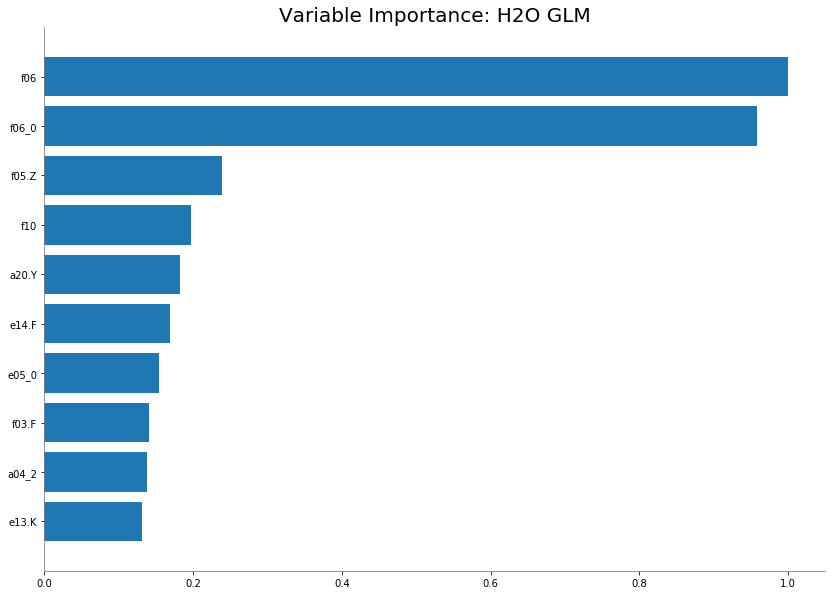

In [390]:
model1.varimp_plot()

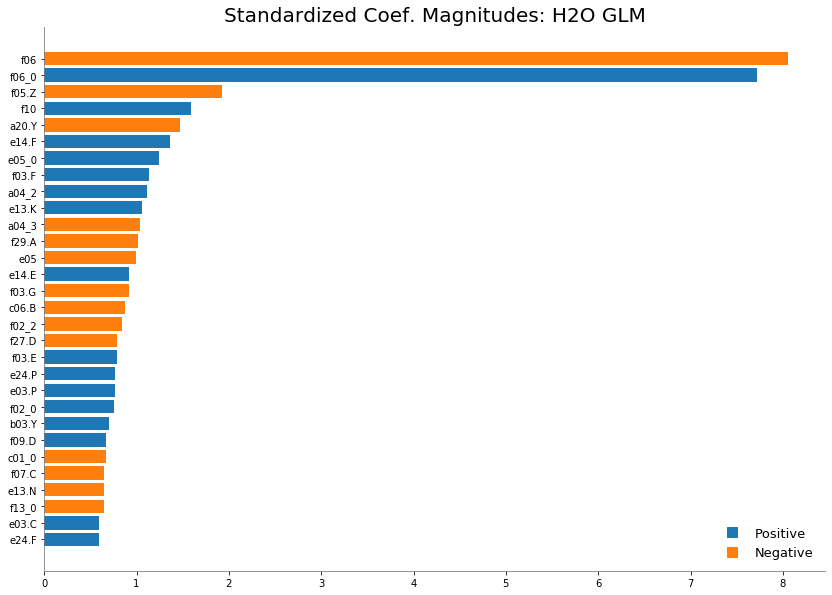

In [391]:
model1.std_coef_plot(30)

PartialDependencePlot progress: |█████████████████████████████████████████| 100%

PartialDependence: Partial Dependence Plot of model GLM_model_python_1594909913268_481 on column 'e20'.


,e20,mean_response,stddev_response,std_error_mean_response
0,,0.470186,0.315840,0.000580
1,025D7,0.475512,0.316505,0.000581
2,2780B,0.512833,0.319654,0.000587
3,30146,0.470186,0.315840,0.000580
4,3424D,0.457355,0.314022,0.000577
5,3D6DA,0.494997,0.318480,0.000585
6,40897,0.412923,0.305383,0.000561
7,40EE1,0.530055,0.320199,0.000588
8,54CD2,0.522993,0.320046,0.000588
9,87D4E,0.513987,0.319708,0.000587



See the whole table with table.as_data_frame()

PartialDependence: Partial Dependence Plot of model GLM_model_python_1594909913268_481 on column 'e20'.


,e20,mean_response,stddev_response,std_error_mean_response
0,,0.470186,0.315840,0.000580
1,025D7,0.475512,0.316505,0.000581
2,2780B,0.512833,0.319654,0.000587
3,30146,0.470186,0.315840,0.000580
4,3424D,0.457355,0.314022,0.000577
5,3D6DA,0.494997,0.318480,0.000585
6,40897,0.412923,0.305383,0.000561
7,40EE1,0.530055,0.320199,0.000588
8,54CD2,0.522993,0.320046,0.000588
9,87D4E,0.513987,0.319708,0.000587



See the whole table with table.as_data_frame()


[]

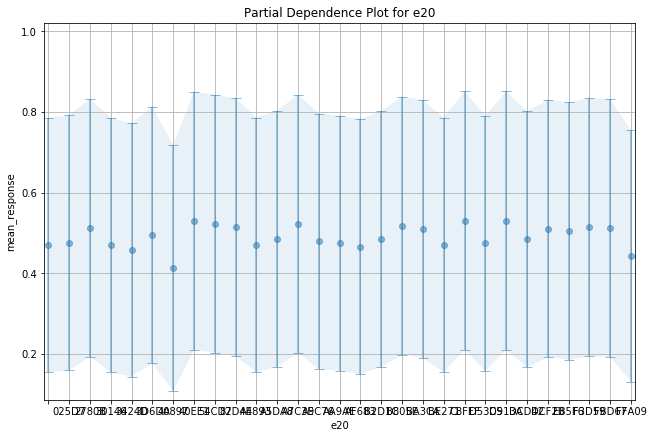

In [392]:
model1.partial_plot(data = h2o_df_test,
                     cols = ['e20'],
                     nbins=50,
                     plot=True, 
                     plot_stddev = True,
                     figsize=(9, 6), 
                     save_to_file=dirPOutput + '20_glm_pdp_e20')

PartialDependencePlot progress: |█████████████████████████████████████████| 100%

PartialDependence: Partial Dependence Plot of model GLM_model_python_1594909913268_481 on column 'f06'.


,f06,mean_response,stddev_response,std_error_mean_response
0,0.000000,0.970031,0.127730,0.000235
1,6.666667,0.927494,0.220142,0.000404
2,13.333333,0.879172,0.298318,0.000548
3,20.000000,0.841845,0.349750,0.000642
4,26.666667,0.823907,0.376384,0.000691
5,33.333333,0.818506,0.382731,0.000703
6,40.000000,0.803635,0.382114,0.000702
7,46.666667,0.744326,0.391432,0.000719
8,53.333333,0.586337,0.397048,0.000729
9,60.000000,0.330392,0.341048,0.000626



PartialDependence: Partial Dependence Plot of model GLM_model_python_1594909913268_481 on column 'f06'.


,f06,mean_response,stddev_response,std_error_mean_response
0,0.000000,0.970031,0.127730,0.000235
1,6.666667,0.927494,0.220142,0.000404
2,13.333333,0.879172,0.298318,0.000548
3,20.000000,0.841845,0.349750,0.000642
4,26.666667,0.823907,0.376384,0.000691
5,33.333333,0.818506,0.382731,0.000703
6,40.000000,0.803635,0.382114,0.000702
7,46.666667,0.744326,0.391432,0.000719
8,53.333333,0.586337,0.397048,0.000729
9,60.000000,0.330392,0.341048,0.000626


[]

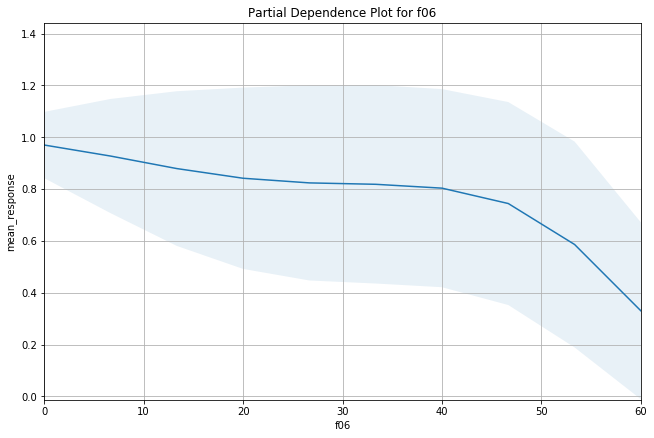

In [393]:
model1.partial_plot(data = h2o_df_test,
                     cols = ['f06'],
                     nbins=10,
                     plot=True, 
                     plot_stddev = True,
                     figsize=(9, 6), 
                     save_to_file=dirPOutput + '20_glm_pdp_f06')

In [394]:
m1_coef = model1.coef()
sorted_coef = sorted(m1_coef.items(), key = lambda x: x[1], reverse = True)

for i in sorted_coef:
    print(i[0],"\n" ,i[1])

#just a quick loop to confirm the graphs and thinking within the DPD

f10
5.5743273138080225
e19
5.361677755743523
e14.F
1.3658340056201497
f03.F
1.1402937664841708
e13.K
1.0644006275042845
f23
0.9310807875481981
e14.E
0.9232850169864358
f03.E
0.7868308168695801
e24.P
0.7628782775621947
e03.P
0.762878277562194
b03.Y
0.703360714215067
f09.D
0.6712060672148621
e03.C
0.5909558544376484
e24.F
0.5881544468128914
f29.F
0.5681467380089525
e14.Z
0.5448429001937211
e24.I
0.496234650217057
a01.B
0.44058178520246855
f22
0.41654317438009275
f13_5
0.3946449309243685
e03.I
0.3862528139868931
f06_0
0.37458456304552884
e03.N
0.36442262012506416
e13.J
0.3605238892775772
e03.E
0.3419580586722326
e24.N
0.34158727490476465
e03.F
0.3313191292532176
f03.D
0.31521477638716117
f27.F
0.3043634628046847
e20.C8FEF
0.29222490427930176
e20.D913A
0.2921159364958806
e11.B
0.2904436587317676
e20.40EE1
0.2878935761266328
f09.G
0.28657674356884094
a12.D
0.28001681754707164
c04.B
0.2749107595464619
f25
0.26800913239504187
e11.C
0.26751797800319493
f29.E
0.2591723231783369
e20.A7C3E
0.2408

In [395]:
rf_bst = H2ORandomForestEstimator(
        model_id = 'rf',
        ntrees=50,
        max_depth=20,
        min_rows=10000,
        mtries=-1,
        sample_rate=0.7,
        col_sample_rate_per_tree=0.7,
        keep_cross_validation_predictions=True,
        stopping_metric = 'AUC'
        )
    
rf_bst.train(x=vars_ind,
            y='target',
            training_frame = h2o_df_train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [396]:
from sklearn.metrics import roc_auc_score
preds2 = rf_bst.predict(h2o_df_val)
preds2 = preds2[0].as_data_frame()['predict'].values
score = roc_auc_score(df_val[var_dep], preds2)
print(score)


drf prediction progress: |████████████████████████████████████████████████| 100%
0.8422602415703353


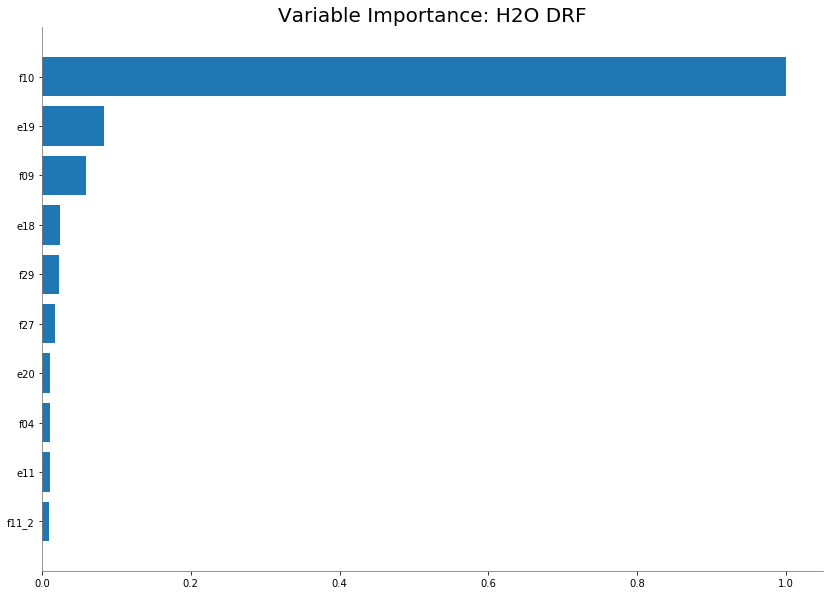

In [397]:
rf_bst.varimp_plot()

Looking at the variable importance there are some distinct differences. The random forest algorithm puts a large weight on the category f10 with a coefficient of 1, wheras the GLM assigns it a coefficient of 0.4. This is a distinct difference as the GLM will assess all variables as equally important and assigns no heirachy towards prediction. Whereas the RF does have hierachy and has identified that f10 is a variable to which other factors should be split from and thus would be expected to interact with possibly other columns/numerics.

PartialDependencePlot progress: |█████████████████████████████████████████| 100%

PartialDependence: Partial Dependence Plot of model rf on column 'f10'.


,f10,mean_response,stddev_response,std_error_mean_response
0,0.001694,0.294213,0.061556,0.000113
1,0.053847,0.295845,0.061066,0.000112
2,0.106000,0.306187,0.061066,0.000112
3,0.158153,0.312493,0.060326,0.000111
4,0.210306,0.344639,0.053417,0.000098
5,0.262459,0.374826,0.053783,0.000099
6,0.314612,0.390496,0.054690,0.000100
7,0.366765,0.397307,0.054950,0.000101
8,0.418918,0.436000,0.065493,0.000120
9,0.471071,0.440746,0.065250,0.000120



PartialDependence: Partial Dependence Plot of model rf on column 'f10'.


,f10,mean_response,stddev_response,std_error_mean_response
0,0.001694,0.294213,0.061556,0.000113
1,0.053847,0.295845,0.061066,0.000112
2,0.106000,0.306187,0.061066,0.000112
3,0.158153,0.312493,0.060326,0.000111
4,0.210306,0.344639,0.053417,0.000098
5,0.262459,0.374826,0.053783,0.000099
6,0.314612,0.390496,0.054690,0.000100
7,0.366765,0.397307,0.054950,0.000101
8,0.418918,0.436000,0.065493,0.000120
9,0.471071,0.440746,0.065250,0.000120


[]

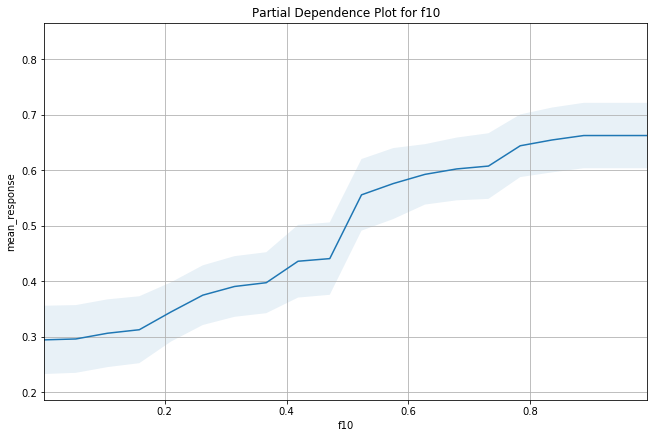

In [398]:
rf_bst.partial_plot(data = h2o_df_test,
                     cols = ['f10'],
                     nbins=20,
                     plot=True, 
                     plot_stddev = True,
                     figsize=(9, 6), 
                     save_to_file=dirPOutput + '20_rf_pdp_overall_qual')

PartialDependencePlot progress: |█████████████████████████████████████████| 100%

PartialDependence: Partial Dependence Plot of model rf on column 'e23'.


,e23,mean_response,stddev_response,std_error_mean_response
0,1.0,0.482266,0.164820,0.000303
1,2.0,0.482266,0.164820,0.000303
2,3.0,0.481688,0.164985,0.000303
3,4.0,0.481688,0.164985,0.000303
4,5.0,0.481688,0.164985,0.000303



PartialDependence: Partial Dependence Plot of model rf on column 'e23'.


,e23,mean_response,stddev_response,std_error_mean_response
0,1.0,0.482266,0.164820,0.000303
1,2.0,0.482266,0.164820,0.000303
2,3.0,0.481688,0.164985,0.000303
3,4.0,0.481688,0.164985,0.000303
4,5.0,0.481688,0.164985,0.000303


[]

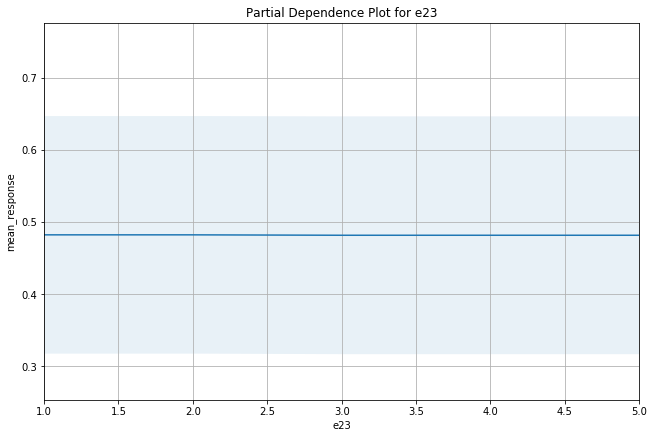

In [399]:
rf_bst.partial_plot(data = h2o_df_test,
                     cols = ['e23'],
                     nbins=30,
                     plot=True, 
                     plot_stddev = True,
                     figsize=(9, 6), 
                     save_to_file=dirPOutput + '20_rf_pdp_e23')

PDP were first proposed by Friedman (2001) to intepret ML algos. it works given a data set, observations, and predictor varibales and a response variable. PDP helps to understand the variable importance in a model. it measures the change in reponse in how a variable affeects a model.

In our analysis of the factor 'f10' the PDP shows that the variable is important in the prediciton of our target variable for both models. It however, appears to be more important for the linear model, and that its prediction is also more consistent due to the smoother curve.

GLM
Most important: f06
Appears to be a significant value when the value has a lesser value being the most important when the value is equal to 0. It has a curved downward sloping line, suggesting as the value increases its mean response decreases.

Least important: e20
Variable doesnt appear to have much effect on the response variable characterized by a large std_error but with a linear effect throughout the dataset.

RF
Most important: f10
Very important feature, with tight confidence intervals suggesting as the value of f10 increases, the signifcance in explaining the repsonse variable does as well. In this, it seems important for its inclusion with a decision tree. Therefore, as values of f10 increases, its fair to saythe probability of fraud being detected increases as well. I wonder what this variable is...

Least Important: e23
Appears to be some dependence on the repsonse within the DPD. ALthough its std_dev is quite varied shown by the wide confidence intervals, the linear relationship suggests some inclusion within the regression. This variable was decided to look up based on the predict_contributions() function within h2o that i explore further in this notebook

Local Interpretable Model-agnostic Explanation. 

trained to approximate the prediciton of some underlying black box model. Its goal is to understand why a model is making predictions instead of just analysing the predictions themselves. It allows a researcher to probe the inner workings of said model and how it comes to its conclusions. This however would not be compatable for the categorical frames to which they had not been converted in both the GLM and RF models. Thus it could not be used within this notebook to observe the instances within this model. ALthough if you used the Driverless AI of H2o it can be implemented as is done pre-lim to the actual prediciton so a researcher can ascertain whether the variables are of importance within the model they are attempting to estimate.

RF and GLM are not supported in the Shapley module! :( However, we can return them for the random forest using the predict_contributions function within h2o, this does not work for the GLM

In [400]:
rf_cont = rf_bst.predict_contributions(h2o_df_val[vars_ind])
rf_cont

contributions progress: |█████████████████████████████████████████████████| 100%


a07,f16,a05,b06,a11,f26,f24,a08,f19,f08,f31,f32,e07,e23,a06,a14,f17,f28,f25,f22,f21,f18,a09,f23,f15,f20,f06,f06_0,f06_1,f06_2,a15,a15_0,a15_1,a15_2,a15_3,a15_4,a15_5,a15_6,d01,d01_0,d01_1,d01_2,d01_3,d01_4,d01_5,e06,e06_0,e06_1,e06_2,e06_3,e06_4,e02,e02_0,e02_1,e02_2,e02_3,e02_4,e02_5,e02_6,e02_7,f01,f01_0,f01_1,f01_2,f01_3,f01_4,a04,a04_0,a04_1,a04_2,a04_3,a04_4,b01,b01_0,b01_1,b01_2,b01_3,b01_4,b01_5,b01_6,f11,f11_0,f11_1,f11_2,f11_3,f11_4,f11_5,f11_6,e15,e15_0,e15_1,e15_2,e15_3,e15_4,e15_5,e15_6,e15_7,c01,c01_0,c01_1,c01_2,c01_3,c01_4,c01_5,b05,b05_0,b05_1,b05_2,b05_3,b05_4,b05_5,b05_6,b05_7,e08,e08_0,e08_1,e08_2,e08_3,e08_4,e08_5,c03,c03_0,c03_1,c03_2,c03_3,c03_4,c03_5,f13,f13_0,f13_1,f13_2,f13_3,f13_4,f13_5,d02,d02_0,d02_1,d02_2,e05,e05_0,e05_1,e05_2,e05_3,e05_4,e05_5,e05_6,e05_7,e04,e04_0,e04_1,e04_2,e04_3,e04_4,e04_5,e04_6,e04_7,f02,f02_0,f02_1,f02_2,f02_3,f02_4,f02_5,f02_6,f02_7,e09,e09_0,e09_1,e09_2,e09_3,e09_4,e09_5,d03,d03_0,d03_1,d03_2,d03_3,e12,e12_0,e12_1,e12_2,e12_3,e12_4,e12_5,e12_6,e12_7,a01,a02,a03,a10,a12,a13,a16,a17,a18,a19,a20,b02,b03,b04,b07,c04,c05,c06,c07,c08,c09,e01,e03,e11,e13,e14,e21,e22,e24,e25,e17,e18,e19,e20,f03,f04,f05,f07,f09,f27,f29,f30,f33,f34,f10,BiasTerm
0,0,0,0,0,0,0,0,0,0,0,0,0,8.96336e-05,0,0,0,0,0,0,0,0,0,0,0,0,-0.000447492,0.00222006,0,-0.000422209,0,0,0,5.91624e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.00115994,-0.00011251,-8.02679e-05,0,-3.32625e-05,0,0,0,0,0,-2.82056e-05,-3.75946e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0128927,0.000879002,0.00458163,0.00405374,0.00698842,0.00196539,-0.00146738,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000201785,0.000182972,0,0,0,0,0,0,0,0,0,0,-7.14499e-05,0.000356494,0,0,0,0,0,0,1.90026e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00238976,0.0013029,0.00266832,-0.00390393,-0.00209763,5.96048e-05,0.000640411,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.31476e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00232582,0,0,0,0,0,0,6.94933e-05,0.0167038,0.0426262,0.00636018,0.000470001,-0.00365211,0,0,0.00582985,0.000268065,0.00676887,0,0,0,0.00100726,0.35399
0,0,0,0,0,0,0,0,0,0,0,0,0,0.000168388,0,0,0,0,0,0,0,0,0,0,0,0,-7.56318e-05,0.000993997,0,-0.000108129,0,0,0,-0.000200532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.000243614,-0.000219736,-0.000133391,0,-0.000119767,0,0,0,0,0,-1.87e-05,-2.62501e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00841105,0.00144233,0.0139774,0.0122064,0.00537219,0.0116915,0.00543833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.72885e-05,-2.0274e-05,0,0,0,0,0,0,0,0,0,0,-0.00014927,0.000146846,0,0,0,0,0,0,2.28807e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00956404,0.00858983,0.00929607,0.00136843,0.000470732,1.81396e-05,-0.000256274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.7539e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0115154,0,0,0,0,0,0,4.38119e-05,-0.0207253,-0.0202371,-0.0106547,0.0041671,0.00125699,0,0,0.0614654,-0.00253169,-0.00190852,0,0,0,0.176314,0.35399
0,0,0,0,0,0,0,0,0,0,0,0,0,0.000492127,0,0,0,0,0,0,0,0,0,0,0,0,-0.000110459,0.00259139,0,-0.000442291,0,0,0,-0.000200532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.00121732,-0.000655194,-0.000391736,0,-0.000417452,0,0,0,0,0,-5.88975e-05,-8.93119e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0045564,0.00254435,0.0046294,0.00153709,0.000277247,-0.000924964,-0.000918518,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.6108e-05,4.18017e-05,0,0,0,0,0,0,0,0,0,0,-9.1724e-05,0.00106867,0,0,0,0,0,0,1.90026e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00966735,0.00831179,0.0104951,0.00230957,0.000722321,0.000544347,-9.17267e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-4.5165e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0106294,0,0,0,0,0,0,-6.99411e-05,0.0254003,-0.0105249,0.00856248,0.0035229,0.000812704,0,0,0.0187182,0.000873051,0.00136654,0,0,0,0.215256,0.35399
0,0,0,0,0,0,0,0,0,0,0,0,0,3.72895e-05,0,0,0,0,0,0,0,0,0,0,0,0,0.000423104,0.00190543,0,0.00029831,0,0,0,-3.79711e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.000172097,0.0001

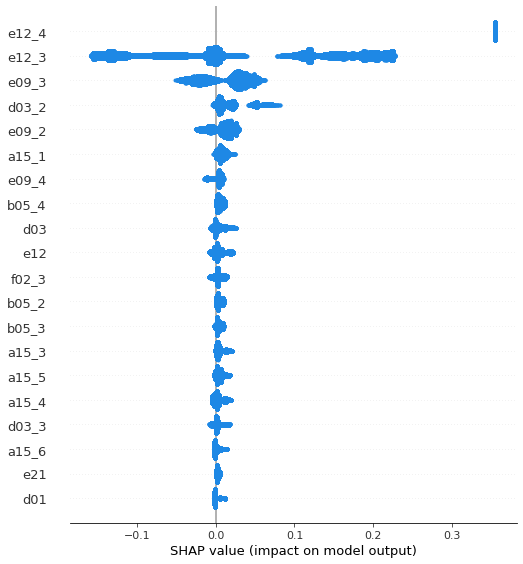

'\nThe Shapley value is the average contribution of a feature value to the prediction in different coalitions. Thus in the RF we observe interestingly that the f10 variable is not evident within this plot. in order words the shapleyy value of a feature is the average change in the prediciton that the colaition already in the model receives when the feature is implemented\n\nTherefore, this could suggest that there is an interaction between the highly important variable f10 and e12.\n\n'

In [401]:
'''
http://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html#:~:text=For%20these%20problems%2C%20the%20predict_contributions%20returns%20a%20new,be%20retrieved%20in%20Python%20using%20SHAP%20functions%20.http://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html#:~:text=For%20these%20problems%2C%20the%20predict_contributions%20returns%20a%20new,be%20retrieved%20in%20Python%20using%20SHAP%20functions%20.

Then we can use the shap module after we return the h2o frame as a pandas dataframe!


# https://shap.readthedocs.io/en/latest/https://shap.readthedocs.io/en/latest/
'''
import shap
shap.initjs()
contributions_matrix = rf_cont.as_data_frame().values
shap_values = contributions_matrix
expected_values = contributions_matrix.min()

#lets plot the effeects of all the features
shap.summary_plot(shap_values, vars_ind)

#from the SHAP values, we see that 
'''
The Shapley value is the average contribution of a feature value to the prediction in different coalitions. Thus in the RF we observe interestingly that the f10 variable is not evident within this plot. in order words the shapleyy value of a feature is the average change in the prediciton that the colaition already in the model receives when the feature is implemented

Therefore, this could suggest that there is an interaction between the highly important variable f10 and e12.

'''

In [402]:
rf_cont_df = rf_cont.as_data_frame() 
final = rf_cont_df.loc[:, (rf_cont_df != 0).any(axis=0)]
final

#of the 232 columns, the contributions towards the Random forest algorithm are only within 45 variables with differing level of contributions

,e23,f06,f06_0,f06_2,a15_2,e02,e02_0,e02_1,e02_3,f01_0,...,e18,e19,e20,f03,f04,f09,f27,f29,f10,BiasTerm
0,0.000090,-0.000447,0.002220,-0.000422,0.000059,-0.001160,-0.000113,-0.000080,-0.000033,-0.000028,...,0.016704,0.042626,0.006360,0.000470,-0.003652,0.005830,0.000268,0.006769,0.001007,0.35399
1,0.000168,-0.000076,0.000994,-0.000108,-0.000201,-0.000244,-0.000220,-0.000133,-0.000120,-0.000019,...,-0.020725,-0.020237,-0.010655,0.004167,0.001257,0.061465,-0.002532,-0.001909,0.176314,0.35399
2,0.000492,-0.000110,0.002591,-0.000442,-0.000201,-0.001217,-0.000655,-0.000392,-0.000417,-0.000059,...,0.025400,-0.010525,0.008562,0.003523,0.000813,0.018718,0.000873,0.001367,0.215256,0.35399
3,0.000037,0.000423,0.001905,0.000298,-0.000038,-0.000172,0.000153,0.000047,0.000038,-0.000032,...,0.014528,0.041334,0.005801,0.002790,0.008694,0.049285,0.000890,0.001454,0.104137,0.35399
4,0.000090,-0.000661,0.002185,-0.000532,0.000059,-0.000104,-0.000113,-0.000080,-0.000033,-0.000062,...,0.010898,0.037613,0.004171,-0.000088,-0.004676,0.004396,0.000891,-0.002188,0.001942,0.35399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.000090,-0.000515,0.002224,-0.000680,0.000202,-0.001199,-0.000151,-0.000072,-0.000105,-0.000236,...,0.010771,0.034315,0.003482,0.000489,0.018898,0.004702,0.000689,0.000015,-0.140363,0.35399
74996,0.000037,0.000595,0.001965,0.000519,-0.000171,0.000387,0.000090,0.000029,0.000036,0.000055,...,0.009667,0.033532,0.005686,0.001144,-0.001785,0.006953,0.000675,0.000109,-0.126177,0.35399
74997,0.000090,-0.000515,0.002038,-0.000638,-0.000189,0.000023,0.000119,0.000063,0.000070,0.000222,...,0.009550,0.035019,0.003134,0.000178,-0.003851,0.006279,0.000633,-0.001237,-0.096911,0.35399
74998,0.000052,-0.000661,0.002371,-0.000765,-0.000171,0.001184,0.000132,0.000063,0.000070,0.000058,...,0.012885,0.042421,0.004148,0.002466,0.025786,0.009465,0.001304,-0.000005,-0.035858,0.35399


In [403]:
#retrieve the number of times a feature was used on a prediction path in a tree model
feature_frequencies = rf_bst.feature_frequencies(h2o_df_val)
feature_frequencies

a07,f16,a05,b06,a11,f26,f24,a08,f19,f08,f31,f32,e07,e23,a06,a14,f17,f28,f25,f22,f21,f18,a09,f23,f15,f20,f06,f06_0,f06_1,f06_2,a15,a15_0,a15_1,a15_2,a15_3,a15_4,a15_5,a15_6,d01,d01_0,d01_1,d01_2,d01_3,d01_4,d01_5,e06,e06_0,e06_1,e06_2,e06_3,e06_4,e02,e02_0,e02_1,e02_2,e02_3,e02_4,e02_5,e02_6,e02_7,f01,f01_0,f01_1,f01_2,f01_3,f01_4,a04,a04_0,a04_1,a04_2,a04_3,a04_4,b01,b01_0,b01_1,b01_2,b01_3,b01_4,b01_5,b01_6,f11,f11_0,f11_1,f11_2,f11_3,f11_4,f11_5,f11_6,e15,e15_0,e15_1,e15_2,e15_3,e15_4,e15_5,e15_6,e15_7,c01,c01_0,c01_1,c01_2,c01_3,c01_4,c01_5,b05,b05_0,b05_1,b05_2,b05_3,b05_4,b05_5,b05_6,b05_7,e08,e08_0,e08_1,e08_2,e08_3,e08_4,e08_5,c03,c03_0,c03_1,c03_2,c03_3,c03_4,c03_5,f13,f13_0,f13_1,f13_2,f13_3,f13_4,f13_5,d02,d02_0,d02_1,d02_2,e05,e05_0,e05_1,e05_2,e05_3,e05_4,e05_5,e05_6,e05_7,e04,e04_0,e04_1,e04_2,e04_3,e04_4,e04_5,e04_6,e04_7,f02,f02_0,f02_1,f02_2,f02_3,f02_4,f02_5,f02_6,f02_7,e09,e09_0,e09_1,e09_2,e09_3,e09_4,e09_5,d03,d03_0,d03_1,d03_2,d03_3,e12,e12_0,e12_1,e12_2,e12_3,e12_4,e12_5,e12_6,e12_7,a01,a02,a03,a10,a12,a13,a16,a17,a18,a19,a20,b02,b03,b04,b07,c04,c05,c06,c07,c08,c09,e01,e03,e11,e13,e14,e21,e22,e24,e25,e17,e18,e19,e20,f03,f04,f05,f07,f09,f27,f29,f30,f33,f34,f10
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,5,8,4,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,4,5,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,13,27,6,1,10,0,0,19,7,9,0,0,0,47
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,3,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,6,17,4,1,0,0,0,13,5,6,0,0,0,34
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,5,4,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,5,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,11,27,6,2,2,0,0,13,6,6,0,0,0,49
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8,20,3,2,3,0,0,16,1,0,0,0,0,35
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,5,8,4,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,5,5,5,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,11,26,6,2,10,0,0,19,6,10,0,0,0,47
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,4,5,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,13,32,5,1,6,0,0,17,5,6,0,0,0,43
0,0

In [404]:
final.mean(axis= 0)

'''
This allocation of value is confirmed in our analysis on the DPD. Here we see that f10 is indeed a very important contributing variable within the random forest algorithm. Furthermore that e23 provides very little contribution towards the prediction of the reponse variable. Therefore according to these shapley values we 
'''

'\nThis allocation of value is confirmed in our analysis on the DPD. Here we see that f10 is indeed a very important contributing variable within the random forest algorithm. Furthermore that e23 provides very little contribution towards the prediction of the reponse variable. Therefore according to these shapley values we \n'

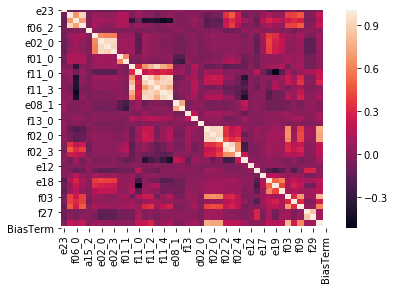

'\nhigh correlation between the splined numeric variables\nnegative correaltion shown between f02 and f11.\nSuggests, there maybe some interaction between these variables within the random forest algorithm\n'

In [405]:
import seaborn as sn
corrMatrix = final.corr()
sn.heatmap(corrMatrix, annot=False)

plt.show()

'''
high correlation between the splined numeric variables
negative correaltion shown between f02 and f11.
Suggests, there maybe some interaction between these variables within the random forest algorithm
'''

In [414]:
h2o_df_val[vars_ind].as_data_frame().values

'''
I attempted to use LIME on these 2 models. But LIME does not know how to handle categorical datasets, and i fed the raw data without any manipulation into the 2 models on purpose to see how they interact within the model on both a feature importance and feature interaction level.

LIME is limited in the sense it must be fed a float array only. If i was to redo this section i would encode all categorical columns not just the high cardinality. but this may change the effectiveness of our algorithms to identify the categorical features in the way they have done. Would it be better? Who knows. The point of this part was to compare and contrast the difference in the modelling structure, prediction and process of 2 competing models which have very similar accuracy and prediction AUCROC despite highlighting the strength in sometimes similar but albeit different features. Thus, i did not want one model to be "better" than the other as this would skew what was intended within this section to both understand and evaluate feature importance as well as possible interactions within the data.

A great package to explore is the driverless AI from h2o as well as Dalex. Both are great modules for the interpretability of Machine Learning models.

'''

array([['B', 'A', 'H', ..., 0, 0, 0],
       ['B', 'A', 'E', ..., 0, 0, 0],
       ['B', 'A', 'B', ..., 5, 0, 0],
       ...,
       ['B', 'C', 'H', ..., 0, 0, 0],
       ['B', 'B', 'H', ..., 0, 0, 0],
       ['B', 'A', 'B', ..., 0, 0, 0]], dtype=object)

In [406]:
'''
To summarise;

SHAP and the var_imp betwen the RF give differnt values because simply, the variable importance in the GLM is the coefficient of the model features within the logistic regression. Whereas in the RF they are the contributions of a specific predicator against those made by other individual predictors in predicting the response variable. 

Thus, SHAP values cannot be determinied from a GLM as it cannot quanitfy the inclusion of new features as all features are included in the preliminary analysis. RF however, will estimate a variety of decision trees with a variety of predictors before evaluating a model. Thus when including a different feature to interact within the model, we can aapproximate its response.

I attempted to use LIME within this section for the RF but LIME struggled with using the h2o dataset as well as the categorical variables from the RF. Thus it hasnt been included within the section and i have attempted to compensate for this with a more thoughtful approach centered around statistical analysis.

Annoyingly, i couldnt directly extract the LIME and ICE on our models within this notebook without using the AutoML and driverless AI, but that in itself may give some models which i did not want to compare. Once again, i took the oppurtunity here to test classical linear estimates vs ML-decision trees to see how they define feature importance and how they identify potential feature interactions.

Overall, this module has been interesting and a lot of work. I breathe a sigh of relief knowing that we are years away from a T2 type scenario.


'''

'\nTo summarise;\n\nSHAP and the var_imp betwen the RF give differnt values because simply, the variable importance in the GLM is the coefficient of the model features within the logistic regression. Whereas in the RF they are the contributions of a specific predicator against those made by other individual predictors in predicting the response variable. \n\nThus, SHAP values cannot be determinied from a GLM as it cannot quanitfy the inclusion of new features as all features are included in the preliminary analysis. RF however, will estimate a variety of decision trees with a variety of predictors before evaluating a model. Thus when including a different feature to interact within the model, we can aapproximate its response.\n\n'